In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
api_key="An68GpwSiKdQlBoZ"
m=MPRester(api_key)
bs = m.get_bandstructure_by_material_id("mp-2133")

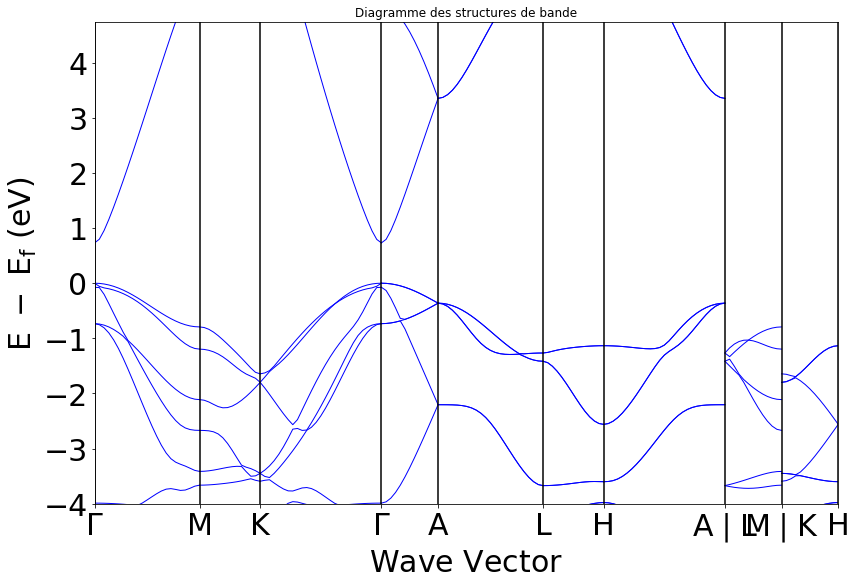

In [3]:
bplot = plotter.BSPlotter(bs)
bplot.get_plot()
plt.title("Diagramme des structures de bande")
plt.show()

# Question 1: determination de la bande interdite

In [4]:
#Question 1:

print(bs.get_band_gap())
print("Il s'agit d'une bande directe.")
print("La direction de transition est Gamma-Gamma.")
print("L'énerge de la bande interdite est 0.731eV")

{'direct': True, 'energy': 0.7309000000000001, 'transition': '\\Gamma-\\Gamma'}
Il s'agit d'une bande directe.
La direction de transition est Gamma-Gamma.
L'énerge de la bande interdite est 0.731eV


# Question 2: direction des plus et moins de dispersion

In [5]:
# Question2:

data = bplot.bs_plot_data() #donnée de la structure de bande (distance, label, energy, vbm, cbm, metal, bandGap...)
ener = data.get('energy') #valeurs des energies des bandes
dist = data.get('distances') #distances auxquelles les energies sont calculées
distint = data.get('ticks').get('distance') #distances des intevalles


# a) La derniere bande de valence

vbm = bs.get_vbm()
print(vbm.get('band_index'))
print("Le minimum de la bande de valence (vbm) est contenu dans la bande 17")

#recherche du minimum de dispersion (pente la plus faible sur un intervalle)
pentemin = 10**100
intmin = 0
for i in range (0,9): #9 est le nombre d'intervalle 
    if (abs((ener[i].get('1')[17][-1]-ener[i].get('1')[17][0])) / (dist[i][-1]-dist[i][0]) < pentemin ):
        pentemin = abs((ener[i].get('1')[17][-1]-ener[i].get('1')[17][0])) / (dist[i][-1]-dist[i][0])
        intmin = i #intevalle de la pente minimum

#recharche du maximum de dispersion (pente la plus forte sur un intervalle)
pentemax = 0
intmax = 0
for j in range (0,9): #9 est le nombre d'intervalle 
    if (abs((ener[j].get('1')[17][-1]-ener[j].get('1')[17][0])) / (dist[j][-1]-dist[j][0]) > pentemax ):
        pentemax = abs((ener[j].get('1')[17][-1]-ener[j].get('1')[17][0])) / (dist[j][-1]-dist[j][0])
        intmax = j #intervalle de la pente maximum

print('')

#b) La premiere bande de conduction

cbm = bs.get_cbm()
print(cbm.get('band_index'))
print("Le maximum de la bande de conduction (cbm) est contenu dans la bande 18")

#recharche du minimum de dispersion
pentemin2 = 10**100
intmin2 = 0
for i in range (0,9): #9 est le nombre d'intervalle 
    if (abs((ener[i].get('1')[18][-1]-ener[i].get('1')[18][0])) / (dist[i][-1]-dist[i][0]) < pentemin2 ):
        pentemin2 = abs((ener[i].get('1')[18][-1]-ener[i].get('1')[18][0])) / (dist[i][-1]-dist[i][0])
        intmin2 = i #intevalle de la pente minimum

#recharche du maximum de dispersion
pentemax2 = 0
intmax2 = 0
for j in range (0,9): #9 est le nombre d'intervalle 
    if (abs((ener[j].get('1')[18][-1]-ener[j].get('1')[18][0])) / (dist[j][-1]-dist[j][0]) > pentemax2 ):
        pentemax2 = abs((ener[j].get('1')[18][-1]-ener[j].get('1')[18][0])) / (dist[j][-1]-dist[j][0])
        intmax2 = j #intervalle de la pente maximum

defaultdict(<class 'list'>, {<Spin.up: 1>: [16, 17]})
Le minimum de la bande de valence (vbm) est contenu dans la bande 17

defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
Le maximum de la bande de conduction (cbm) est contenu dans la bande 18


In [6]:
print("Le maximum de dispersion dans la derniere bande de valence est:","",pentemax)
print("La dispersion s'effectue dans la direction M-K")
print('')

print("Le minimum de dispersion dans la derniere bande de valence est:","",pentemin)
print("La dispersion s'effectue dans la direction L-M")
print('')

print("Le maximum de dispersion dans la premiere bande de conduction est:","",pentemax2)
print("La dispersion s'effectue dans la direction K-\u0393")
print('')

print("Le minimum de dispersion dans la premiere bande de conduction est:","",pentemin2)
print("La dispersion s'effectue dans la direction A|L-M|K")

Le maximum de dispersion dans la derniere bande de valence est:  1.341118254539398
La dispersion s'effectue dans la direction M-K

Le minimum de dispersion dans la derniere bande de valence est:  0.20860439015626966
La dispersion s'effectue dans la direction L-M

Le maximum de dispersion dans la premiere bande de conduction est:  5.267928820414088
La dispersion s'effectue dans la direction K-Γ

Le minimum de dispersion dans la premiere bande de conduction est:  0.09136339183631159
La dispersion s'effectue dans la direction A|L-M|K


Les maximums de dispersion sont indiques par les fleches rouges
Les minimums de dispersion sont indiques par les fleches vertes


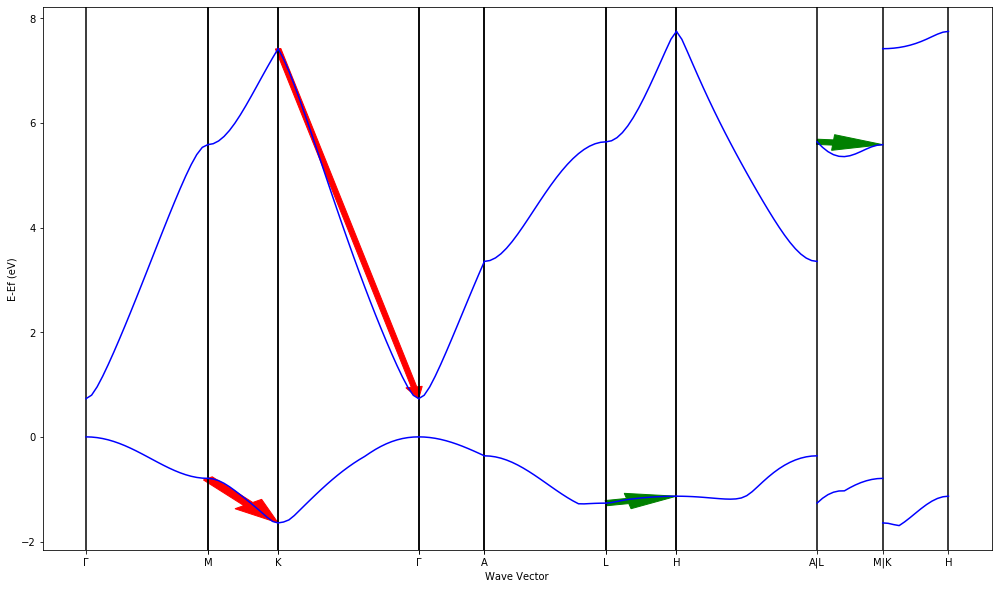

In [7]:
fig,ax = plt.subplots(1,1,figsize=(17,10))

for i in range(len(distint)):
    plt.axvline(distint[i],0,color="black")
ax.set_xticks(distint)
ax.set_xticklabels(['\u0393',"",'M',"",'K',"",'\u0393',"",'A',"",'L',"",'H','A|L','M|K','H'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')


for i in range(len(dist)): #plot les bandes contenant le vbm et le cbm
    plt.plot(dist[i],ener[i].get('1')[17],'b')
    plt.plot(dist[i],ener[i].get('1')[18],'b')
    
#fleche minimum de dispersion bande de valence
lenArrX = dist[intmin][-1] - dist[intmin][0]
lenArrY = ener[intmin].get('1')[17][-1] - ener[intmin].get('1')[17][0]
plt.arrow(dist[intmin][0],ener[intmin].get('1')[17][0],lenArrX, lenArrY,color='g',width=0.1,length_includes_head=True)

#fleche maximum de dispersion bande de valence
lenArrX = dist[intmax][-1] - dist[intmax][0]
lenArrY = ener[intmax].get('1')[17][-1] - ener[intmax].get('1')[17][0]
plt.arrow(dist[intmax][0],ener[intmax].get('1')[17][0],lenArrX, lenArrY,color='r',width=0.1,length_includes_head=True)

#fleche minimum de dispersion bande de conduction
lenArrX = dist[intmin2][-1] - dist[intmin2][0]
lenArrY = ener[intmin2].get('1')[18][-1] - ener[intmin2].get('1')[18][0]
plt.arrow(dist[intmin2][0],ener[intmin2].get('1')[18][0],lenArrX, lenArrY,color='g',width=0.1,length_includes_head=True)

#fleche maximum de dispersion bande de conduction
lenArrX = dist[intmax2][-1] - dist[intmax2][0]
lenArrY = ener[intmax2].get('1')[18][-1] - ener[intmax2].get('1')[18][0]
plt.arrow(dist[intmax2][0],ener[intmax2].get('1')[18][0],lenArrX, lenArrY,color='r',width=0.05,length_includes_head=True)

print("Les maximums de dispersion sont indiques par les fleches rouges")
print("Les minimums de dispersion sont indiques par les fleches vertes")

# Question 3: masses effectives

On approxime la courbe d'energie autour du vbm par une parabole de type ax^2 + bx + c
Les coefficient a, b, c de cette parabole sont  [ -1.32172925   7.95255752 -11.96216897]
La effective au sommet de la derniere bande de valence est:  -2.6258472087854974e-30  kg


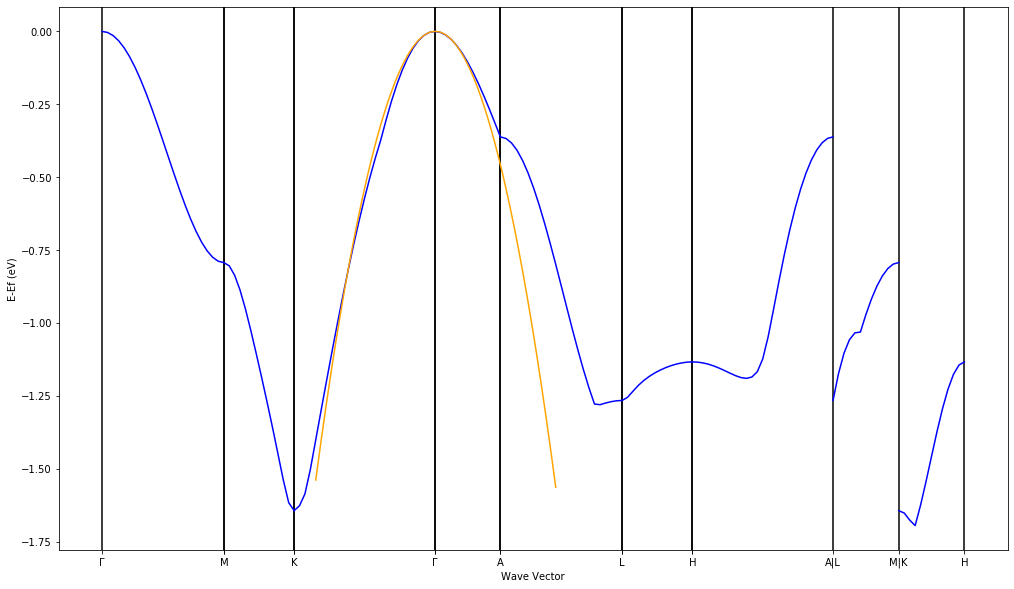

In [8]:
#Question3
ang = 10**-10 #il faut convertir les distances en metre
joule = 1.602176563*10**(-19) #il faut convertir les energies en joule
hbar = 1.054571818*10**(-34)

#a) Approximation parabolique autour du vbm
fig,ax = plt.subplots(1,1,figsize=(17,10))

for i in range(len(distint)):
    plt.axvline(distint[i],0,color="black")
ax.set_xticks(distint)
ax.set_xticklabels(['\u0393',"",'M',"",'K',"",'\u0393',"",'A',"",'L',"",'H','A|L','M|K','H'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')


for i in range(len(dist)):
    plt.plot(dist[i],ener[i].get('1')[17],'b')

x = [dist[2][-3], dist[3][0],dist[3][3]]
y = [ener[2].get('1')[17][-3], ener[3].get('1')[17][0], ener[3].get('1')[17][3]]

parabole = np.polyfit(x,y,2)
interval = np.linspace(dist[2][4],dist[4][10],1000) #les distances sont choisies arbitrairement pour avoir une jolie parabole
plt.plot(interval, np.polyval(parabole,interval), 'orange')

#systeme de 3 equations a 3 inconnues pour determiner les coefficients a, b et c de la parabole
A = [[x[0]**2, x[0], 1], [x[1]**2, x[1], 1], [x[2]**2, x[2], 1]]
B = np.transpose(y)
abc = np.linalg.solve(A,B)
print("On approxime la courbe d'energie autour du vbm par une parabole de type ax^2 + bx + c")
print("Les coefficient a, b, c de cette parabole sont", "", abc)

masse = hbar**2/(2*abc[0]*ang**2*joule)
print("La effective au sommet de la derniere bande de valence est:","", masse,"","kg")

On approxime la courbe d'energie autour du cbm par une parabole de type ax^2 + bx + c
Les coefficient a, b, c de cette parabole sont  [  20.6733401  -124.3827762   187.82008611]
La effective au sommet de la premiere bande de conduction est:  1.6788090548735356e-31  kg


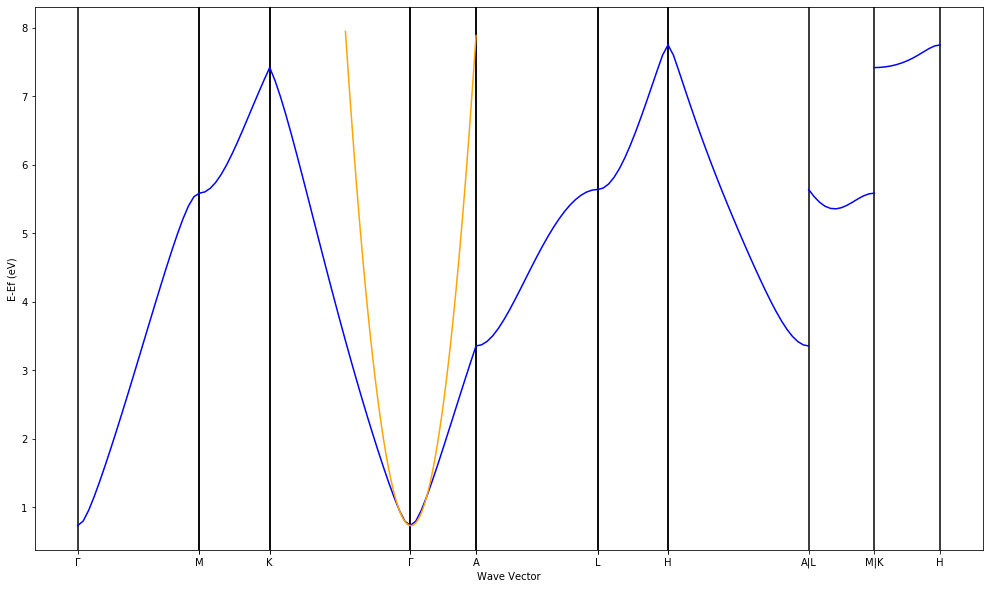

In [9]:
#b) Approximation parabolique autour du cbm
fig,ax = plt.subplots(1,1,figsize=(17,10))

for i in range(len(distint)):
    plt.axvline(distint[i],0,color="black")
ax.set_xticks(distint)
ax.set_xticklabels(['\u0393',"",'M',"",'K',"",'\u0393',"",'A',"",'L',"",'H','A|L','M|K','H'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')


for i in range(len(dist)):
    plt.plot(dist[i],ener[i].get('1')[18],'b')

x = [dist[2][-3], dist[3][0],dist[3][3]]
y = [ener[2].get('1')[18][-3], ener[3].get('1')[18][0], ener[3].get('1')[18][3]]

parabole = np.polyfit(x,y,2)
interval = np.linspace(dist[2][-13],dist[3][-1],1000)
plt.plot(interval, np.polyval(parabole,interval), 'orange')

#for j in range (len(y)):
#    y[j] = joule*y[j]
A = [[x[0]**2, x[0], 1], [x[1]**2, x[1], 1], [x[2]**2, x[2], 1]]
B = np.transpose(y)
abc = np.linalg.solve(A,B) #coeff a,b,c de la parabole

print("On approxime la courbe d'energie autour du cbm par une parabole de type ax^2 + bx + c")
print("Les coefficient a, b, c de cette parabole sont", "", abc)

masse = hbar**2/(2*abc[0]*ang**2*joule)
print("La effective au sommet de la premiere bande de conduction est:","", masse,"","kg")